# import stuff

In [1]:
from useful_scit.imps import (pd,np,xr,za,mpl,plt,sns, pjoin, os,glob,dt,sys,ucp,log, splot)

sys.path.insert(0, "../")

import util.functions as fun

# import pynio

# OMI SO2

In [2]:
# def main():
# global open_path, set_time, cols, get_hys, lat1, lon1, dis
data_path = '../data/omi/'
xa = fun.import_omi_xarray(data_path)

In [3]:
xa1 = fun.filter_quality_flags_below_zero(xa)

/Users/diego/miniconda3/envs/b36/lib/python3.6/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [4]:
xa1 = fun.assgign_lat_lon_coords(xa1)

In [5]:
xa3 = fun.group_by_lat_lon(xa1)
xa3 = fun.sum_over_all_layers(xa3)
xa4 = xa3['tot'].mean('dt')
xa5 = xa4.where(xa4 >= 0, 0)

/Users/diego/miniconda3/envs/b36/lib/python3.6/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


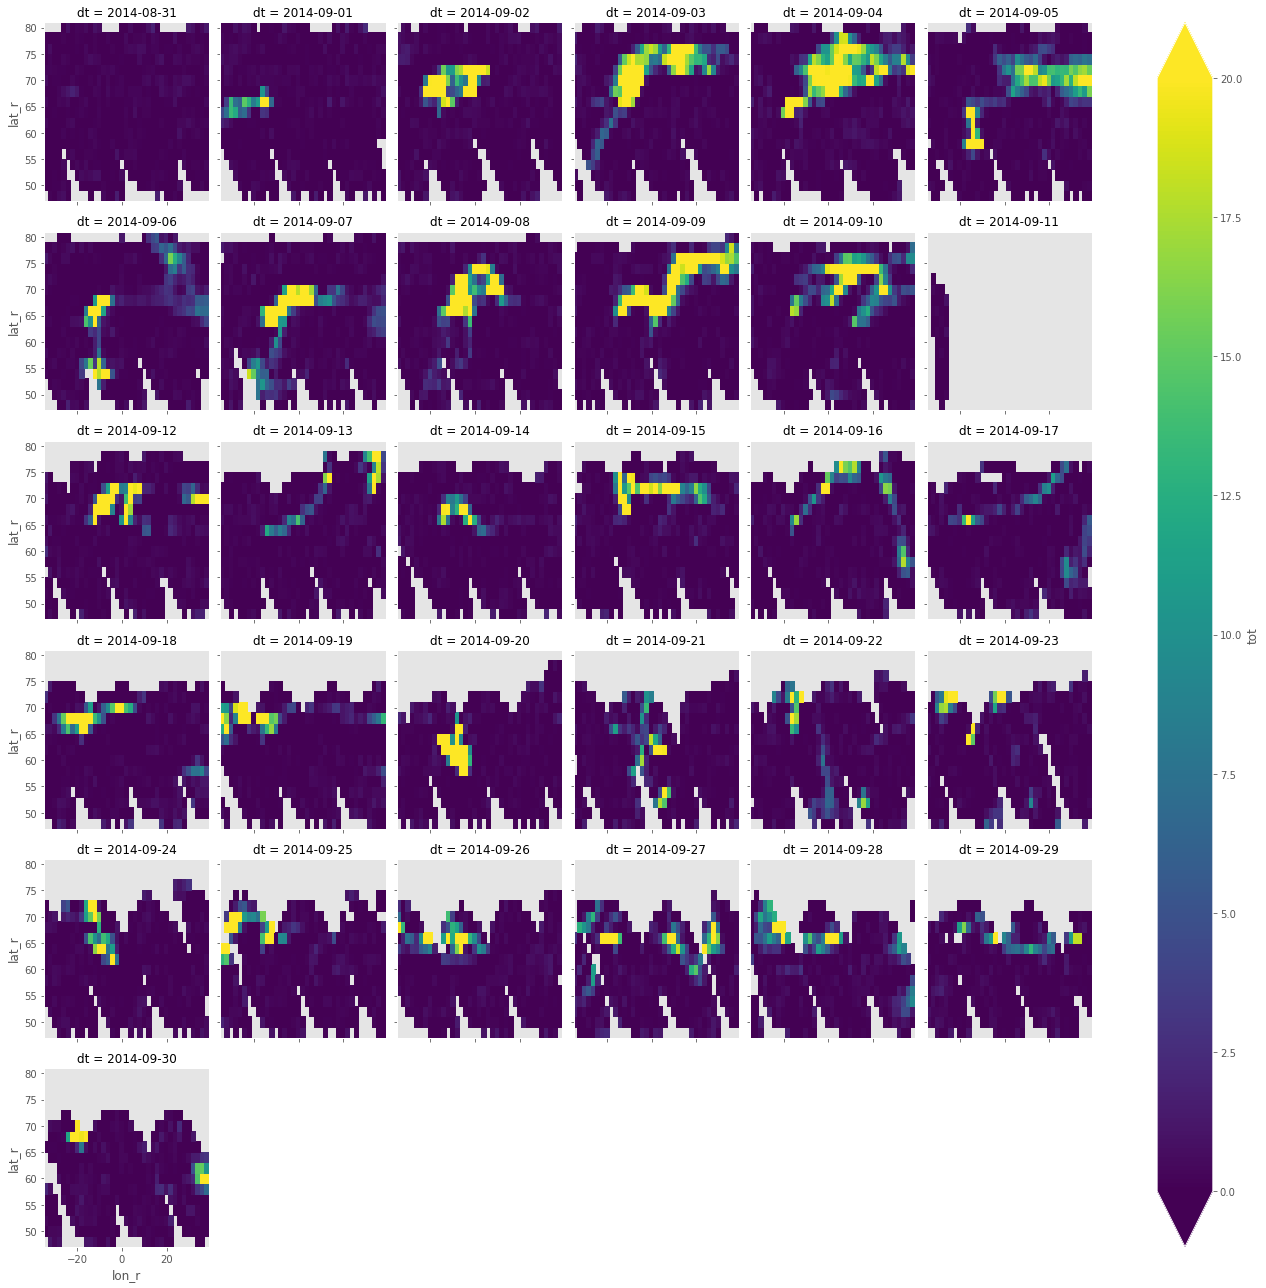

In [6]:
ops = dict(x='lon_r', y='lat_r', vmin=0, vmax=20)
fun.plot_total_divided_by_month(ops, xa3)

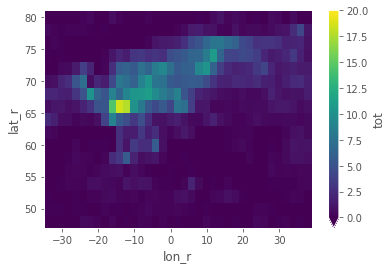

In [7]:
fun.simple_plot_totals(ops, xa4)

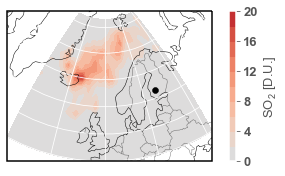

In [8]:
ax = fun.plot_paper_so2(xa5)
ax.figure.savefig('./so2.png', dpi=300)
ax.figure.savefig('./so2.pdf')

# hysplit stuff

In [24]:
files = glob.glob('../data/hysplit/hysplit201409*.traj')
xa1 = fun.get_hysplit_xarray(files,power_distance_norm=1)

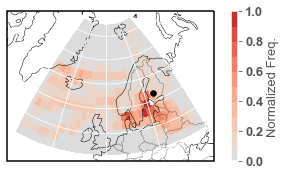

In [25]:
ax = fun.plot_paper_hysplit(xa1/xa1.max())
ax.figure.savefig('./hys.png', dpi=300)
ax.figure.savefig('./hys.pdf')

In [ ]:
# main()